<a href="https://colab.research.google.com/github/dton24/PortfolioProjects/blob/main/ResumeTextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Exploration and Preprocessing

Import packages

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
import numpy as np
import pickle
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files #using the load file function, we import dataset
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Load Data

In [ ]:
# Load data from a CSV file
df = pd.read_csv('updated_data_final_cleaned.csv')  # replace with the path to your csv file

Explore Data

In [ ]:
df.head()

,instruction,input,Resume_test
0,Generate a Resume for a Accountant Job,NaN,ACCOUNTANT Professional Summary Results orient...
1,Generate a Resume for a Accountant Job,NaN,STAFF ACCOUNTANT Summary Flexible Accountant w...
2,Generate a Resume for a Accountant Job,NaN,STAFF ACCOUNTANT Summary Highly analytical and...
3,Generate a Resume for a Accountant Job,NaN,SENIOR ACCOUNTANT Summary A highly competent m...
4,Generate a Resume for a Accountant Job,NaN,SENIOR ACCOUNTANT Summary 11 years experience ...


In [ ]:
df.shape

(32481, 3)

### Data Preprocessing

In [ ]:
# Make df have 2 columns (independent and dependent variables)
df = df[['instruction', 'Resume_test']]

In [ ]:
# Rename columns for clearer understanding
df = df.rename(columns={'instruction': 'job_type','Resume_test': 'text'})

In [ ]:
# Drop rows where 'text' is NaN
df = df.dropna(subset=['text'])

df = df.dropna(subset=['job_type'])


In [ ]:
df.shape

(32480, 2)

In [ ]:
df['job_type'].unique()

array(['Generate a Resume for a Accountant Job',
       'Generate a Resume for a Advocate Job',
       'Generate a Resume for a Agriculture Job',
       'Generate a Resume for a Apparel Job',
       'Generate a Resume for a Arts Job',
       'Generate a Resume for a Automation Testing Job',
       'Generate a Resume for a Automobile Job',
       'Generate a Resume for a Aviation Job',
       'Generate a Resume for a BPO Job',
       'Generate a Resume for a Banking Job',
       'Generate a Resume for a Blockchain Job',
       'Generate a Resume for a Business Analyst Job',
       'Generate a Resume for a Business Development Job',
       'Generate a Resume for a Chef Job',
       'Generate a Resume for a Civil Engineer Job',
       'Generate a Resume for a Construction Job',
       'Generate a Resume for a Consultant Job',
       'Generate a Resume for a Data Science Job',
       'Generate a Resume for a Database Job',
       'Generate a Resume for a Database Administrator Job',
      

Remove Jobs that don't follow all under general categories

In [ ]:
# Get rid of jobs that don't fall under general categories. Even if we made a category for "other", they would have such different words in each type of resume that it would worsen our model performance.
# Updated list of values to remove
values_to_remove_updated = [
    'Generate a Resume for a Advocate Job',
    'Generate a Resume for a Agriculture Job',
    'Generate a Resume for a Apparel Job',
    'Generate a Resume for a Automobile Job',
    'Generate a Resume for a Aviation Job',
    'Generate a Resume for a Chef Job',
    'Generate a Resume for a Construction Job',
    'Generate a Resume for a Teacher Job',
    'Generate a Resume for a Testing Job'
]

# Remove rows where 'job_type' matches any value in values_to_remove_updated
df = df[~df['job_type'].isin(values_to_remove_updated)]


In [ ]:
#Check to see if these values are still in the df
df['job_type'].unique()

array(['Generate a Resume for a Accountant Job',
       'Generate a Resume for a Arts Job',
       'Generate a Resume for a Automation Testing Job',
       'Generate a Resume for a BPO Job',
       'Generate a Resume for a Banking Job',
       'Generate a Resume for a Blockchain Job',
       'Generate a Resume for a Business Analyst Job',
       'Generate a Resume for a Business Development Job',
       'Generate a Resume for a Civil Engineer Job',
       'Generate a Resume for a Consultant Job',
       'Generate a Resume for a Data Science Job',
       'Generate a Resume for a Database Job',
       'Generate a Resume for a Database Administrator Job',
       'Generate a Resume for a Designer Job',
       'Generate a Resume for a DevOps Engineer Job',
       'Generate a Resume for a Digital Media Job',
       'Generate a Resume for a DotNet Developer Job',
       'Generate a Resume for a ETL Developer Job',
       'Generate a Resume for a Electrical Engineering Job',
       'Generate a

In [ ]:
df.dropna()

,job_type,text
0,Generate a Resume for a Accountant Job,ACCOUNTANT Professional Summary Results orient...
1,Generate a Resume for a Accountant Job,STAFF ACCOUNTANT Summary Flexible Accountant w...
2,Generate a Resume for a Accountant Job,STAFF ACCOUNTANT Summary Highly analytical and...
3,Generate a Resume for a Accountant Job,SENIOR ACCOUNTANT Summary A highly competent m...
4,Generate a Resume for a Accountant Job,SENIOR ACCOUNTANT Summary 11 years experience ...
...,...,...
32476,Generate a Resume for a Web Developer Job,Software Engineer span lSoftwarespan Engineer ...
32477,Generate a Resume for a Web Developer Job,Sr Systems Manager Sr Business Manager Sr span...
32478,Generate a Resume for a Web Developer Job,Full Stack NET Developer Full Stack NET span l...
32479,Generate a Resume for a Web Developer Job,Director of Information Systems Director of In...


Remove the words "Generate a Resume for a Job" and only keep what job title it is

In [ ]:
df.isna().sum()

job_type    0
text        0
dtype: int64

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
X, y = df.text, df.job_type

In [ ]:
X.shape

(31627,)

In [ ]:
len(X), len(y)

(31627, 31627)

In [ ]:
y.unique()

array(['Generate a Resume for a Accountant Job',
       'Generate a Resume for a Arts Job',
       'Generate a Resume for a Automation Testing Job',
       'Generate a Resume for a BPO Job',
       'Generate a Resume for a Banking Job',
       'Generate a Resume for a Blockchain Job',
       'Generate a Resume for a Business Analyst Job',
       'Generate a Resume for a Business Development Job',
       'Generate a Resume for a Civil Engineer Job',
       'Generate a Resume for a Consultant Job',
       'Generate a Resume for a Data Science Job',
       'Generate a Resume for a Database Job',
       'Generate a Resume for a Database Administrator Job',
       'Generate a Resume for a Designer Job',
       'Generate a Resume for a DevOps Engineer Job',
       'Generate a Resume for a Digital Media Job',
       'Generate a Resume for a DotNet Developer Job',
       'Generate a Resume for a ETL Developer Job',
       'Generate a Resume for a Electrical Engineering Job',
       'Generate a

In [ ]:
# Words to be removed
remove_words = {'Generate', 'a', 'Resume', 'for', 'Job'}

# Function to remove specified words from a string
def remove_unwanted_words(text, unwanted_words):
    return ' '.join(word for word in text.split() if word not in unwanted_words)

# Apply the function to each string in the list
y= [remove_unwanted_words(text, remove_words) for text in y]

Display Unique Jobs

In [ ]:
#Display unique values in y
# Convert list to a pandas Series
y_series = pd.Series(y)

# Get unique values from the Series
unique_values = y_series.unique()

# Display the unique values
print(unique_values)

['Accountant' 'Arts' 'Automation Testing' 'BPO' 'Banking' 'Blockchain'
 'Business Analyst' 'Business Development' 'Civil Engineer' 'Consultant'
 'Data Science' 'Database' 'Database Administrator' 'Designer'
 'DevOps Engineer' 'Digital Media' 'DotNet Developer' 'ETL Developer'
 'Electrical Engineering' 'Engineering' 'Finance' 'Fitness' 'HR' 'Hadoop'
 'Health and fitness' 'Healthcare' 'Information Technology'
 'Java Developer' 'Mechanical Engineer' 'Network Administrator'
 'Network Security Engineer' 'Operations Manager' 'PMO' 'Project manager'
 'Public Relations' 'Python Developer' 'SAP Developer' 'Sales'
 'Security Analyst' 'Software Developer' 'Systems Administrator'
 'Web Designing' 'Web Developer']


**Cluster Jobs into Categories**

In [ ]:
def categorized_titles(job_titles):
    # Define the categories with Finance separated from Business
    category_keywords = {
        "Information Technology": ['Automation Testing', 'Blockchain', 'Data Science', 'Database',
                                  'Database Administrator', 'DevOps Engineer', 'ETL Developer',
                                  'Hadoop', 'Java Developer', 'Network Administrator',
                                  'Network Security Engineer', 'Python Developer', 'SAP Developer',
                                  'Software Developer', 'Systems Administrator', 'Web Designing',
                                  'Web Developer', 'Information Technology', 'Security Analyst',
                                  'DotNet Developer'],

        "Business": [
            "Business Analyst", "Business Development",
            "Consultant", "Operations Manager", "PMO", "Project manager", "Sales",
            "HR", "BPO"],

        "Finance": [
            "Finance", "Banking", "Accountant"],

        "Creative & Media": [
            "Arts", "Designer", "Digital Media", "Public Relations"],

        "Engineering": [
            "Civil Engineer", "Electrical Engineering",
            "Engineering", "Mechanical Engineer"],

        "Health & Fitness": [
            "Fitness", "Health and fitness", "Healthcare"]
    }

    # Replace each job title with its corresponding category
    categorized_titles = []
    for title in job_titles:
        categorized = False
        for category, keywords in category_keywords.items():
            if title in keywords:
                categorized_titles.append(category)
                categorized = True
                break
        if not categorized:
            categorized_titles.append("Other")

    return categorized_titles

y= categorized_titles(y)


In [ ]:
# Find unique values in the list 'y'
unique_values = set(y)

# If you need the result as a list
unique_values_list = list(unique_values)

# Display the unique values
print(unique_values)


{'Business', 'Health & Fitness', 'Creative & Media', 'Information Technology', 'Finance', 'Engineering'}


In [ ]:
print(X.shape)

(31627,)


In [ ]:
X[1:123]

1      STAFF ACCOUNTANT Summary Flexible Accountant w...
2      STAFF ACCOUNTANT Summary Highly analytical and...
3      SENIOR ACCOUNTANT Summary A highly competent m...
4      SENIOR ACCOUNTANT Summary 11 years experience ...
5      FINANCIAL ACCOUNTANT Summary CPA Financial Acc...
                             ...                        
118    I Other Skills Course Skill Name Board Year Of...
119    Operating Systems Windows XP Vista 07Education...
120    Operating Systems Windows XP Vista 07Education...
121    Additional qualifications April 2000 Web Desig...
122    Good communication skill Quick learner Keen to...
Name: text, Length: 122, dtype: object

**Creating a corpus**

In [ ]:
# Get English stop words from NLTK
stop_words = set(stopwords.words('english'))

corpus = []

# Assuming X is your list of documents/texts
for i in range(len(X)):
    # Preprocessing steps as before
    text = re.sub(r'\W', ' ', str(X[i]))
    text = text.lower()
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    text = re.sub(r'^[a-z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)

    # New step: Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    corpus.append(text)

norm_corpus = corpus

## Training Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(norm_corpus, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),  # Convert text into a matrix of TF-IDF features
    ('clf', LogisticRegression()),  # The Logistic Regression classifier
])

text_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression())])

In [ ]:
print("Accuracy:", accuracy_score(y_train, text_clf.predict(X_train)))

Accuracy: 0.880202363542943


In [ ]:
predicted = text_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)


Accuracy: 0.869269680682896


**Interpreting Model Results**

Top 30 words (based on coefficients for each job category)

In [ ]:
# Assuming that text_clf is your pipeline and the last step is named 'clf' which is a LogisticRegression
feature_names = text_clf.named_steps['tfidf'].get_feature_names_out()

# Get the coefficients of the LogisticRegression model
coefficients = text_clf.named_steps['clf'].coef_

n_top_words = 30

# For each class, sort the features by the coefficient values and display the top words
for i, class_label in enumerate(text_clf.named_steps['clf'].classes_):
    top_indices = coefficients[i].argsort()[-n_top_words:][::-1]  # Indices of top words
    top_words = [feature_names[j] for j in top_indices]  # Top words
    print(f"Class {class_label}: {', '.join(top_words)}")


Class Business: hr, sales, consultant, security, years, administrator, python, server, internet, developer, october, warranty, span, database, web, end, business, freelancer, employee, branch, css, development, bootcamp, javascript, html, implemented, using, bs, ecommerce, install
Class Creative & Media: arts, city, media, state, relations, designer, public, digital, marketing, company, art, press, interior, floral, design, events, students, karate, creative, social, drawing, martial, advertising, maharashtra, learning, teacher, research, english, instructional, painting
Class Engineering: engineering, electrical, mechanical, civil, manufacturing, company, city, autocad, industrial, engineer, equipment, plastering, inspection, details, power, safety, machine, description, plant, nexio, cnc, drawings, test, fabrication, quality, india, chemical, catia, qa, material
Class Finance: finance, financial, banking, accounting, accountant, city, bank, state, cash, credit, accounts, payroll, loa

Top 30 Words and their Coefficients

In [ ]:
def get_top_words_with_coefficients(text_clf, n_top_words=30):

  feature_names = text_clf.named_steps['tfidf'].get_feature_names_out()
  coefficients = text_clf.named_steps['clf'].coef_

  top_words_by_class = {}
  for i, class_label in enumerate(text_clf.named_steps['clf'].classes_):
    top_indices = coefficients[i].argsort()[-n_top_words:][::-1]  # Indices of top words
    top_words_with_coef = [(feature_names[j], coefficients[i][j]) for j in top_indices]
    top_words_by_class[class_label] = top_words_with_coef

  return top_words_by_class

# Example usage
top_words_by_class = get_top_words_with_coefficients(text_clf)

# **Crucially, to access coefficients for each class:**
for class_label, top_words_with_coef in top_words_by_class.items():
  print(f"Class: {class_label}")
  for word, coefficient in top_words_with_coef:
    print(f"\tWord: {word}, Coefficient: {coefficient:.4f}")


Class: Business
	Word: hr, Coefficient: 3.6648
	Word: sales, Coefficient: 2.5710
	Word: consultant, Coefficient: 1.8354
	Word: security, Coefficient: 1.6749
	Word: years, Coefficient: 1.5002
	Word: administrator, Coefficient: 1.3976
	Word: python, Coefficient: 1.3246
	Word: server, Coefficient: 1.2604
	Word: internet, Coefficient: 1.2441
	Word: developer, Coefficient: 1.2285
	Word: october, Coefficient: 1.2199
	Word: warranty, Coefficient: 1.2181
	Word: span, Coefficient: 1.2148
	Word: database, Coefficient: 1.1802
	Word: web, Coefficient: 1.1775
	Word: end, Coefficient: 1.1703
	Word: business, Coefficient: 1.1658
	Word: freelancer, Coefficient: 1.1536
	Word: employee, Coefficient: 1.1204
	Word: branch, Coefficient: 1.0895
	Word: css, Coefficient: 1.0866
	Word: development, Coefficient: 1.0659
	Word: bootcamp, Coefficient: 1.0256
	Word: javascript, Coefficient: 1.0155
	Word: html, Coefficient: 0.9696
	Word: implemented, Coefficient: 0.9642
	Word: using, Coefficient: 0.9615
	Word: bs, C

Top 30 Words and their Weights

In [ ]:
# Assuming text_clf is your pipeline and the last step 'clf' is a LogisticRegression
feature_names = text_clf.named_steps['tfidf'].get_feature_names_out()

# Get the coefficients of the LogisticRegression model
coefficients = text_clf.named_steps['clf'].coef_

n_top_words = 30

# Normalize coefficients using L1 norm
l1_norm = np.abs(coefficients).sum(axis=1)  # L1 norm for each class (sum of abs values)
normalized_coefficients = coefficients / l1_norm[:, np.newaxis]

print(f"Total words in vocabulary: {len(feature_names)}")
print(f"Normalization: {coefficients.std()}")

# Calculate and display the top words based on the coefficients (weights)
for i, class_label in enumerate(text_clf.named_steps['clf'].classes_):
    print(f"Class {class_label}:")

    # Sort the coefficients and get the top 'n_top_words' indices
    top_indices = coefficients[i].argsort()[-n_top_words:][::-1]

    # Calculate the percentage contribution of each word
    total_weight = abs(coefficients[i]).sum()  # Use absolute values to sum up the importance
    for index in top_indices:
        word = feature_names[index]
        weight = coefficients[i][index]
        word_weight_percentage = (abs(weight) / total_weight) * 100  # Convert to percentage, use absolute value if needed
        print(f"{word}: {word_weight_percentage:.2f}%")

    print("\n")



Total words in vocabulary: 205497
Normalization: 0.05054018446025844
Class Business:
hr: 0.05%
sales: 0.04%
consultant: 0.03%
security: 0.02%
years: 0.02%
administrator: 0.02%
python: 0.02%
server: 0.02%
internet: 0.02%
developer: 0.02%
october: 0.02%
warranty: 0.02%
span: 0.02%
database: 0.02%
web: 0.02%
end: 0.02%
business: 0.02%
freelancer: 0.02%
employee: 0.02%
branch: 0.02%
css: 0.02%
development: 0.02%
bootcamp: 0.02%
javascript: 0.01%
html: 0.01%
implemented: 0.01%
using: 0.01%
bs: 0.01%
ecommerce: 0.01%
install: 0.01%


Class Creative & Media:
arts: 0.34%
city: 0.28%
media: 0.24%
state: 0.23%
relations: 0.22%
designer: 0.21%
public: 0.18%
digital: 0.17%
marketing: 0.17%
company: 0.16%
art: 0.13%
press: 0.12%
interior: 0.12%
floral: 0.12%
design: 0.12%
events: 0.12%
students: 0.11%
karate: 0.10%
creative: 0.10%
social: 0.10%
drawing: 0.10%
martial: 0.10%
advertising: 0.09%
maharashtra: 0.09%
learning: 0.09%
teacher: 0.08%
research: 0.08%
english: 0.08%
instructional: 0.08%
paint

Word Cloud for Top 30 Words for Each Job Type

Class Business:


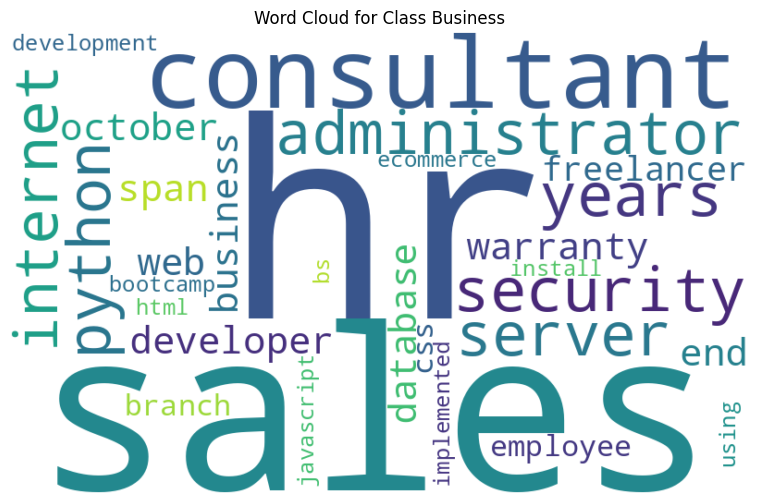

Class Creative & Media:


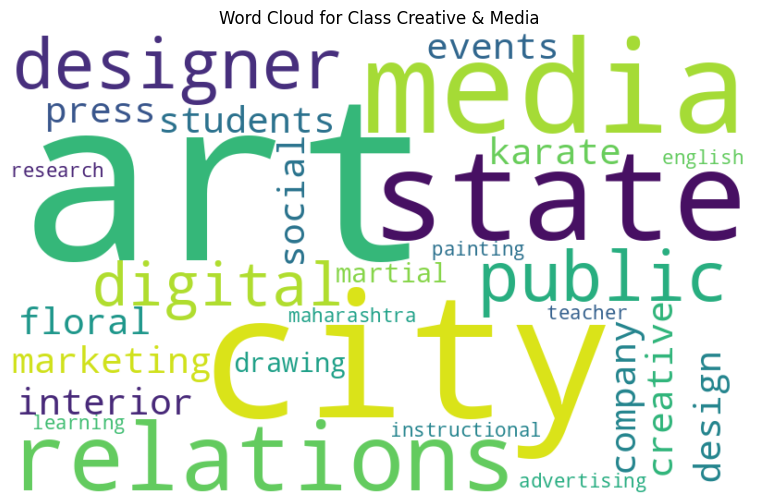

Class Engineering:


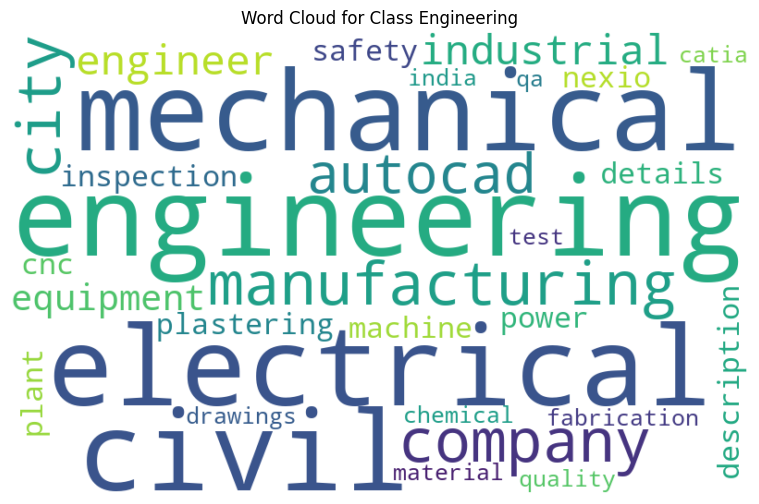

Class Finance:


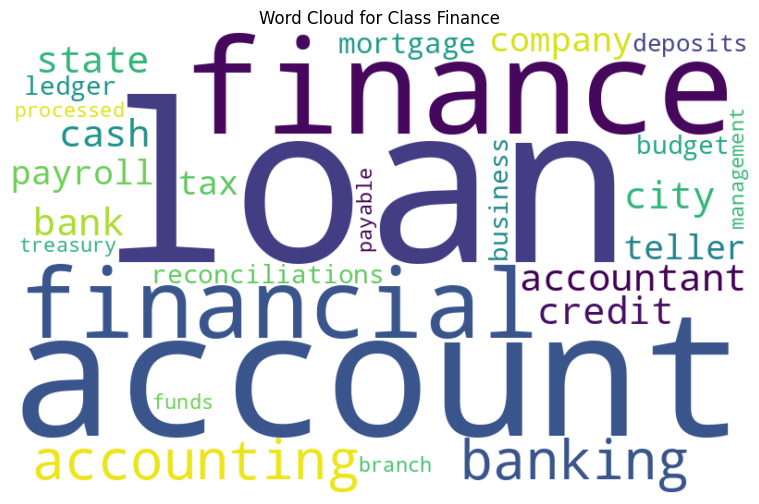

Class Health & Fitness:


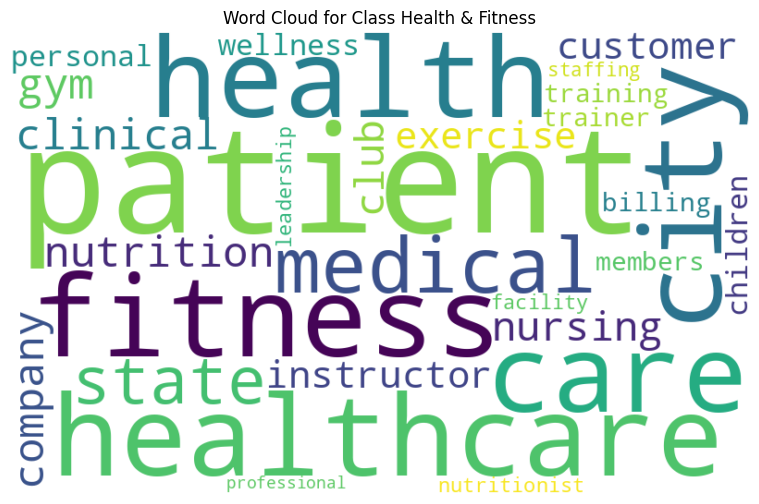

Class Information Technology:


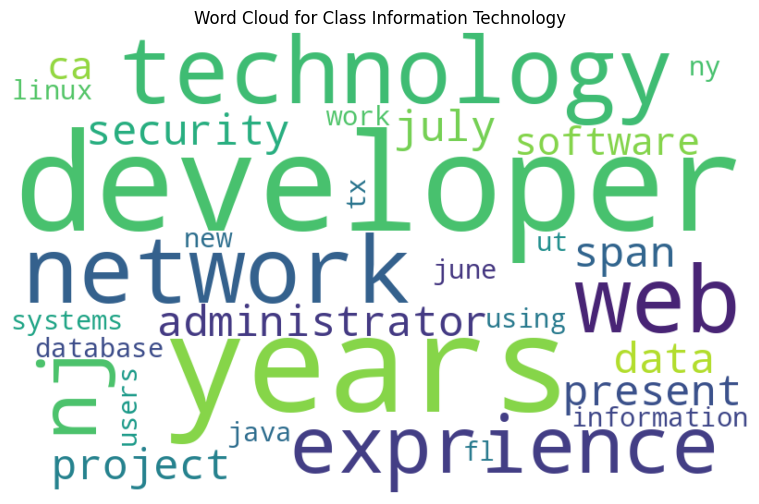

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have the variables as defined in your prompt
feature_names = text_clf.named_steps['tfidf'].get_feature_names_out()
coefficients = text_clf.named_steps['clf'].coef_
n_top_words = 30

for i, class_label in enumerate(text_clf.named_steps['clf'].classes_):
    print(f"Class {class_label}:")

    # Create a single string containing the top words and their weights
    top_words_string = ""
    top_indices = coefficients[i].argsort()[-n_top_words:][::-1]
    total_weight = abs(coefficients[i]).sum()
    for index in top_indices:
        word = feature_names[index]
        weight = abs(coefficients[i][index])
        word_weight_percentage = (weight / total_weight) * 100  # Use absolute weight for word cloud
        top_words_string += f"{word} {word_weight_percentage:.2f} "

    # Generate the word cloud with white background
    wordcloud = WordCloud(width=800, height=500, background_color="white").generate(top_words_string)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Class {class_label}")
    plt.show()

Bottom 30 Words for Each Job Type (Words that should always be avoided in these resume types)

In [ ]:

feature_names = text_clf.named_steps['tfidf'].get_feature_names_out()

# Get the coefficients of the LogisticRegression model
coefficients = text_clf.named_steps['clf'].coef_

n_bottom_words = 30

# Normalize coefficients using L1 norm
l1_norm = np.abs(coefficients).sum(axis=1)  # L1 norm for each class (sum of abs values)
normalized_coefficients = coefficients / l1_norm[:, np.newaxis]

print(f"Total words in vocabulary: {len(feature_names)}")
print(f"Normalization: {coefficients.std()}")

# Calculate and display the bottom words based on the coefficients (weights)
for i, class_label in enumerate(text_clf.named_steps['clf'].classes_):
    print(f"Class {class_label}:")

    # Sort the coefficients and get the bottom 'n_bottom_words' indices
    bottom_indices = coefficients[i].argsort()[:n_bottom_words]

    # Calculate the percentage contribution of each word
    total_weight = abs(coefficients[i]).sum()  # Use absolute values to sum up the importance
    for index in bottom_indices:
        word = feature_names[index]
        weight = coefficients[i][index]
        word_weight_percentage = (abs(weight) / total_weight) * 100  # Convert to percentage, use absolute value if needed
        print(f"{word}: {word_weight_percentage:.2f}%")

    print("\n")


Total words in vocabulary: 205497
Normalization: 0.05054018446025844
Class Business:
healthcare: 0.03%
fitness: 0.03%
financial: 0.02%
city: 0.02%
engineering: 0.02%
company: 0.02%
mechanical: 0.02%
media: 0.02%
arts: 0.02%
state: 0.02%
finance: 0.02%
maharashtra: 0.02%
banking: 0.02%
word: 0.02%
accountant: 0.02%
power: 0.02%
research: 0.02%
day: 0.01%
online: 0.01%
title: 0.01%
pricing: 0.01%
series: 0.01%
electrical: 0.01%
nutrition: 0.01%
drawings: 0.01%
driven: 0.01%
equipment: 0.01%
successfully: 0.01%
personal: 0.01%
coach: 0.01%


Class Creative & Media:
developer: 0.13%
years: 0.12%
business: 0.11%
sales: 0.10%
financial: 0.09%
project: 0.09%
engineering: 0.09%
accounting: 0.08%
administrator: 0.08%
span: 0.08%
web: 0.08%
exprience: 0.07%
security: 0.07%
using: 0.07%
fitness: 0.07%
work: 0.07%
finance: 0.06%
systems: 0.06%
hr: 0.06%
present: 0.06%
august: 0.06%
data: 0.06%
python: 0.06%
ca: 0.06%
management: 0.06%
software: 0.06%
services: 0.05%
healthcare: 0.05%
java: 0.05%
m

Word Cloud for Worst 10 Words

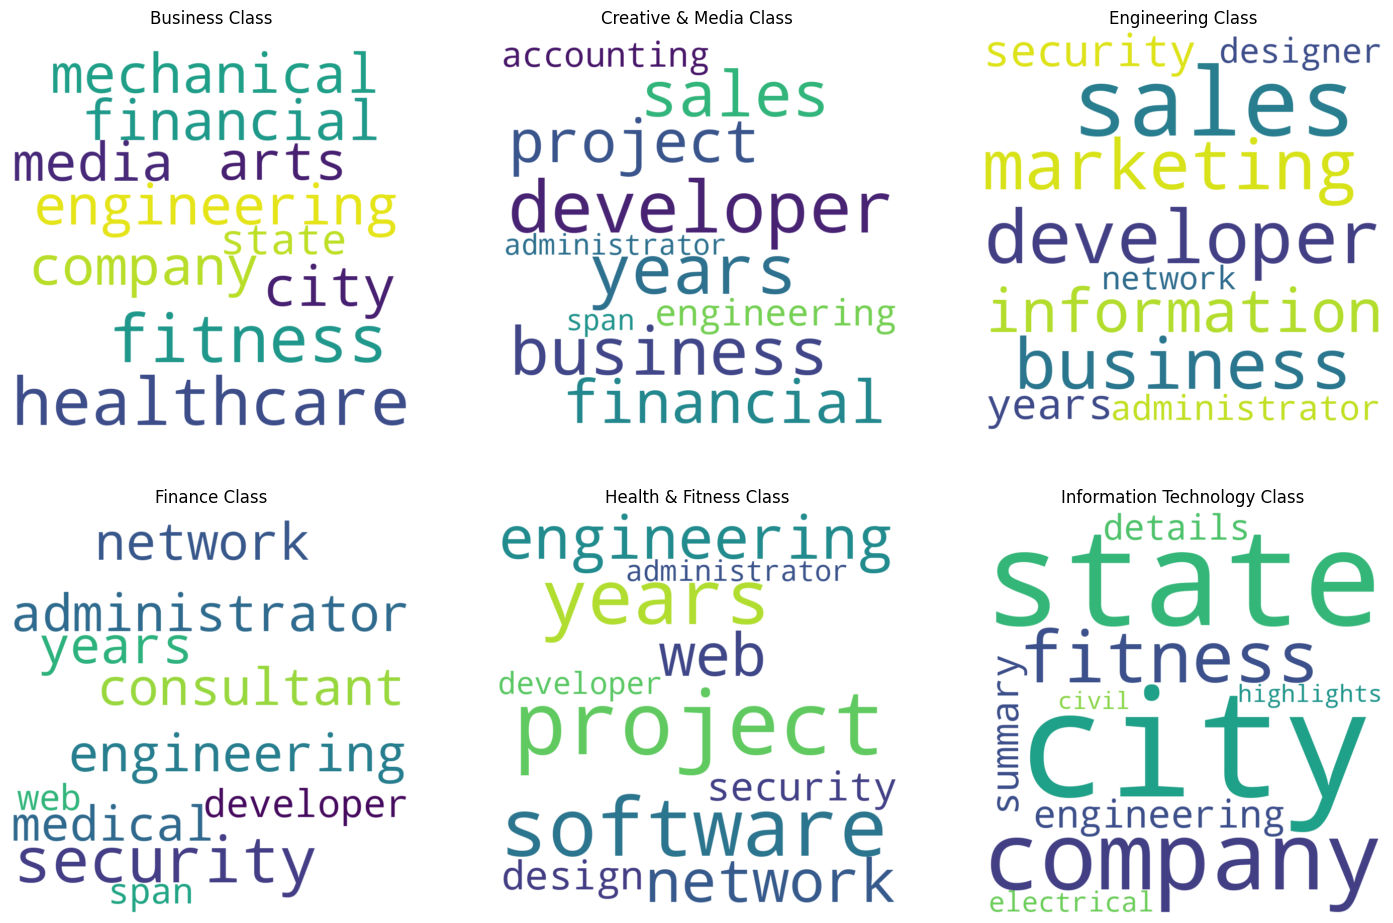

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Data for each class
class_data = {
    "Business": {"healthcare": 0.03, "fitness": 0.03, "financial": 0.02, "city": 0.02, "engineering": 0.02,
                 "company": 0.02, "mechanical": 0.02, "media": 0.02, "arts": 0.02, "state": 0.02},
    "Creative & Media": {"developer": 0.13, "years": 0.12, "business": 0.11, "sales": 0.10, "financial": 0.09,
                         "project": 0.09, "engineering": 0.09, "accounting": 0.08, "administrator": 0.08,
                         "span": 0.08},
    "Engineering": {"sales": 0.15, "developer": 0.11, "business": 0.10, "marketing": 0.10, "information": 0.10,
                    "security": 0.10, "years": 0.09, "administrator": 0.09, "designer": 0.09, "network": 0.08},
    "Finance": {"security": 0.10, "administrator": 0.09, "years": 0.09, "network": 0.09, "consultant": 0.09,
                "engineering": 0.09, "medical": 0.08, "developer": 0.08, "web": 0.07, "span": 0.07},
    "Health & Fitness": {"project": 0.12, "software": 0.10, "years": 0.09, "engineering": 0.08, "network": 0.08,
                         "web": 0.08, "security": 0.08, "design": 0.08, "developer": 0.08, "administrator": 0.07},
    "Information Technology": {"city": 0.11, "state": 0.09, "company": 0.06, "fitness": 0.03, "engineering": 0.03,
                               "summary": 0.03, "details": 0.03, "electrical": 0.02, "highlights": 0.02, "civil": 0.02}
}

# Create and display word clouds for each class
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.tight_layout(pad=3.0)

for i, (class_name, words) in enumerate(class_data.items()):
    ax = axes[i // 3, i % 3]
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(words)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"{class_name} Class")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for top words in each class
classes = ["Business", "Creative & Media", "Engineering", "Finance", "Health & Fitness", "Information Technology"]
top_words = {
    "Business": [("hr", 0.05), ("sales", 0.04), ("consultant", 0.03), ("security", 0.02), ("years", 0.02),
                 ("administrator", 0.02), ("python", 0.02), ("server", 0.02), ("internet", 0.02), ("developer", 0.02)],
    "Creative & Media": [("arts", 0.34), ("city", 0.28), ("media", 0.24), ("state", 0.23), ("relations", 0.22),
                         ("designer", 0.21), ("public", 0.18), ("digital", 0.17), ("marketing", 0.17), ("company", 0.16)],
    "Engineering": [("engineering", 0.71), ("electrical", 0.37), ("mechanical", 0.35), ("civil", 0.32),
                    ("manufacturing", 0.22), ("company", 0.19), ("city", 0.19), ("autocad", 0.18),
                    ("industrial", 0.17), ("engineer", 0.16)],
    "Finance": [("finance", 0.55), ("financial", 0.51), ("banking", 0.42), ("accounting", 0.40),
                ("accountant", 0.34), ("city", 0.30), ("bank", 0.26), ("state", 0.26), ("cash", 0.23), ("credit", 0.22)],
    "Health & Fitness": [("fitness", 0.65), ("healthcare", 0.45), ("city", 0.29), ("health", 0.26), ("care", 0.25),
                         ("medical", 0.25), ("state", 0.23), ("nutrition", 0.22), ("patient", 0.21), ("clinical", 0.20)],
    "Information Technology": [("developer", 0.04), ("years", 0.03), ("technology", 0.03), ("network", 0.02),
                               ("web", 0.02), ("exprience", 0.02), ("nj", 0.02), ("administrator", 0.02),
                               ("data", 0.02), ("project", 0.02)]
}

In [ ]:
# Convert the top words data into a DataFrame
data_frames = []
for class_name, words in top_words.items():
    df = pd.DataFrame(words, columns=['Word', 'Weight'])
    df['Class'] = class_name
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames)

# Resetting the index
combined_df.reset_index(drop=True, inplace=True)
combined_df

,Word,Weight,Class
0,hr,0.05,Business
1,sales,0.04,Business
2,consultant,0.03,Business
3,security,0.02,Business
4,years,0.02,Business
5,administrator,0.02,Business
6,python,0.02,Business
7,server,0.02,Business
8,internet,0.02,Business
9,developer,0.02,Business


In [ ]:
# Save the DataFrame to a CSV file
csv_file_path = '/content/top_words_by_class.csv'
combined_df.to_csv(csv_file_path, index=False)

csv_file_path

'/content/top_words_by_class.csv'